In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

In [5]:
df = pd.read_csv("./composlang-beh_no-dupes_loo-corr.csv", index_col=0)
df_agg = df.groupby("subject_id").mean()
df_agg["loo_corr_ecdf"] = ECDF(df_agg["loo_corr"])(df_agg["loo_corr"])
# .plot.scatter(x="loo_corr", y="loo_pval", s=1, c="black", alpha=0.5)

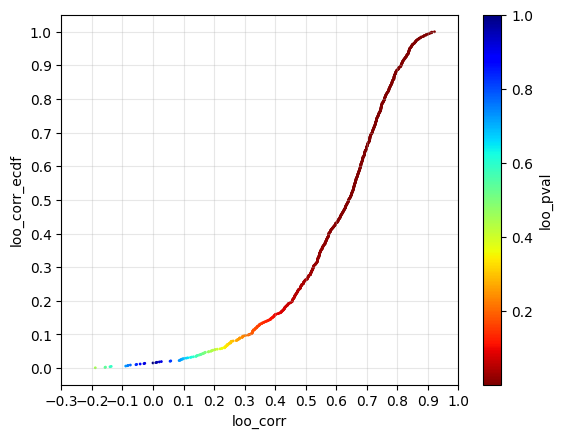

In [6]:
df_agg.sort_values("loo_corr_ecdf").plot.scatter(
    y="loo_corr_ecdf", x="loo_corr", s=1, c="loo_pval", cmap="jet_r"
)
plt.yticks(np.arange(0, 1.01, 0.1))
plt.xticks(np.arange(-0.3, 1.01, 0.1))
plt.grid(alpha=0.3)
plt.show()

In [8]:
df_agg[(df_agg["loo_corr"] < 0.3) | (df_agg["loo_pval"] > 0.05)]

,item_index,age,rt,time_elapsed,trial_index,response,rating,count,loo_corr,loo_pval,loo_corr_ecdf
subject_id,,,,,,,,,,,
55848744fdf99b574f55ada0,6275.969565,51.0,5927.513043,7.991201e+05,114.5,-0.743478,-0.276761,136.856522,0.423479,0.079915,0.169908
55bd6a44fdf99b4c1b12562d,8619.534783,50.0,3882.752174,4.534910e+05,114.5,-0.147826,-0.217593,136.573913,0.463628,0.052634,0.212897
5692e00c8d93fe000efa0459,8463.347826,42.0,4299.486957,5.692133e+05,114.5,-1.256522,-0.344114,136.660870,0.400508,0.099555,0.158649
56a87cf67f05cb000cd03873,8928.578261,48.0,7494.226087,1.086094e+06,114.5,-2.426087,-0.449249,136.665217,0.085685,0.735323,0.022518
56de005e6893b5000ce95d71,8772.769565,47.0,2596.495652,3.616384e+05,114.5,-0.617391,-0.325714,136.817391,0.464867,0.051922,0.215967
...,...,...,...,...,...,...,...,...,...,...,...
63b6be5e93fb553e9f17f8a6,8758.047826,31.0,3731.730435,4.990986e+05,114.5,0.869565,-0.082678,137.173913,0.380683,0.119113,0.143296
63b6d9a59f04985573644798,8283.547826,50.0,6826.943478,1.043205e+06,114.5,0.900000,-0.088189,137.043478,0.421357,0.081600,0.168884
63b7184e9e1b04851f3a3f0b,8339.239130,42.0,8382.160870,1.137110e+06,114.5,2.104348,-0.212311,137.056522,0.418144,0.084199,0.164790


In [7]:
view = df[~((df["loo_corr"] < 0.3) | (df["loo_pval"] > 0.05))]
view

,item_index,subject_id,study_id,country,language,gender,age,rt,time_elapsed,trial_index,item,response,trial_type,rating,count,loo_corr,loo_pval
230,230,62fb79a36ba83fbcd9b713c6,637d1591e10c9bfd91689241,Other,Other,Female,22.0,23159,92235,0,sick painting,-2,crit,0.000000,6,0.695116,0.001364
231,231,62fb79a36ba83fbcd9b713c6,637d1591e10c9bfd91689241,Other,Other,Female,22.0,3222,95460,1,sorry waterway,-3,crit,-2.785714,14,0.695116,0.001364
232,232,62fb79a36ba83fbcd9b713c6,637d1591e10c9bfd91689241,Other,Other,Female,22.0,41943,137406,2,external continuation,-2,crit,0.142857,14,0.695116,0.001364
233,233,62fb79a36ba83fbcd9b713c6,637d1591e10c9bfd91689241,Other,Other,Female,22.0,10492,147901,3,native offspring,-2,crit,1.200000,5,0.695116,0.001364
234,234,62fb79a36ba83fbcd9b713c6,637d1591e10c9bfd91689241,Other,Other,Female,22.0,5680,153583,4,fundamental presenter,0,crit,0.250000,8,0.695116,0.001364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224705,16490,6287818abba6a55b1d5db5c7,637d1591e10c9bfd91689241,UK,English,Male,22.0,2058,766621,225,architectural abbreviation,-3,crit,-1.250000,12,0.717601,0.000800
224706,16306,6287818abba6a55b1d5db5c7,637d1591e10c9bfd91689241,UK,English,Male,22.0,6590,773212,226,private manifesto,2,crit,2.000000,7,0.717601,0.000800
224707,12342,6287818abba6a55b1d5db5c7,637d1591e10c9bfd91689241,UK,English,Male,22.0,2008,775221,227,tropical conviction,-3,crit,-2.500000,8,0.717601,0.000800
224708,228,6287818abba6a55b1d5db5c7,637d1591e10c9bfd91689241,UK,English,Male,22.0,1372,776594,228,fat prison,-3,anti,-2.259980,977,0.717601,0.000800


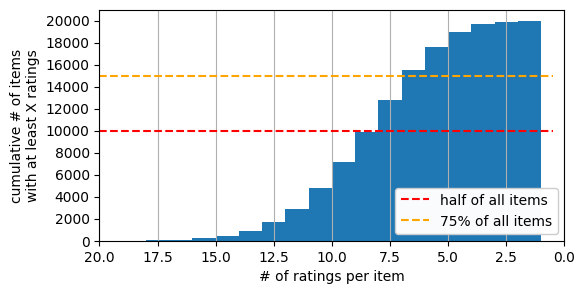

In [9]:
f, a = plt.subplots(figsize=(6, 3))
a.hist(
    view[view.trial_type == "crit"].groupby("item_index").count()["item"],
    bins=20,
    cumulative=-1,
)
a.invert_xaxis()

a.set(
    xlabel="# of ratings per item",
    ylabel="cumulative # of items\nwith at least X ratings",
    # xticks=np.arange(1, 21, 2),
    xlim=(20, 0),
)
a.set_yticks(np.arange(0, len(set(view.item_index)) + 1, 2_000))
a.grid(
    axis="x",
    which="both",
)
a.hlines(
    10_000, 20, 0.5, color="red", linestyle="--", lw=1.5, label="half of all items"
)
a.hlines(
    0.75 * 20_000,
    20,
    0.5,
    color="orange",
    linestyle="--",
    lw=1.5,
    label="75% of all items",
)

a.legend(loc="lower right").get_frame().set_alpha(0.98)
plt.show()

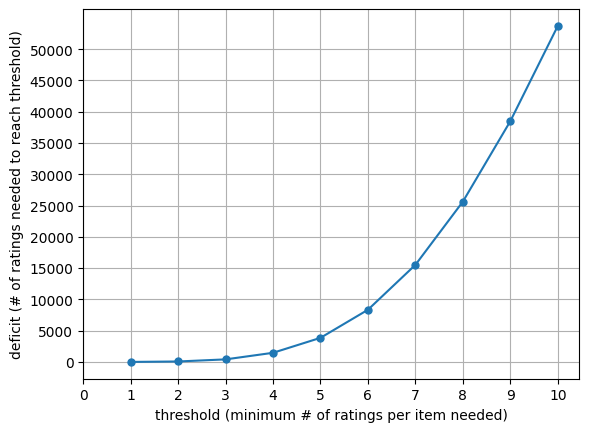

In [10]:
view_ = view[view.trial_type == "crit"].groupby("item_index").count()["item"]


def deficit_by_threshold(threshold):
    deficit = sum(threshold - view_[view_ < threshold].to_numpy())
    return deficit


thresholds = np.arange(1, 11, 1)
deficits = [deficit_by_threshold(threshold) for threshold in thresholds]

f, a = plt.subplots()
a.plot(thresholds, deficits, marker="o", ms=5, lw=1.5)
a.set_yticks(np.arange(0, 50_001, 5_000))
a.set_xticks(np.arange(0, 11, 1))

a.set_xlabel("threshold (minimum # of ratings per item needed)")
a.set_ylabel("deficit (# of ratings needed to reach threshold)")

a.grid()

In [14]:
agg_dict = {
    # defaultdict(
    # lambda: lambda thing: None, #Counter(thing).most_common(1)[0][0],
    # {
    "item_index": "first",
    "subject_id": "count",
    "response": list,
    "rt": "mean",
    "age": "mean",
    "trial_type": "first",
}
# )
# for c in df.columns:
#     agg_dic[c]

by_item = (
    view.groupby("item")
    .agg(agg_dict)
    .rename(columns={"subject_id": "count", "response": "responses"})
    .reset_index()
)
by_item["rating"] = by_item["responses"].apply(np.mean)
by_item["responses"] = by_item["responses"].apply(np.array)
by_item.index = by_item.item_index.values

by_item.to_csv("./composlang-beh_no-dupes_exclude-loo_agg-by-item.csv")
by_item

,item,item_index,count,responses,rt,age,trial_type,rating
16273,African aftermath,16273,6,"[-2, -2, 3, 1, 1, 2]",2734.333333,30.166667,crit,0.500000
14988,African bill,14988,6,"[2, 3, -1, -3, -3, 2]",5306.666667,35.833333,crit,0.000000
4192,African can,4192,6,"[2, -1, 3, 1, 2, 0]",4260.833333,26.500000,crit,1.166667
17362,African catalog,17362,8,"[3, 3, -1, -1, 3, -3, -1, -3]",3491.375000,32.375000,crit,0.000000
4587,African chance,4587,11,"[-2, -3, 3, -1, -2, -1, -2, -3, -2, 1, 0]",4111.181818,29.636364,crit,-1.090909
...,...,...,...,...,...,...,...,...
14860,young socket,14860,8,"[-3, -3, -3, -3, 0, -3, 2, -2]",3872.375000,25.625000,crit,-1.875000
5367,young spacecraft,5367,11,"[2, -3, -2, -1, 0, -3, 3, 3, 0, 2, 0]",4878.000000,27.090909,crit,0.090909
3659,young taxi,3659,10,"[-3, -3, 2, -1, -2, -1, -3, -3, -2, -1]",4184.800000,32.500000,crit,-1.700000
19318,young timing,19318,3,"[-3, -3, -3]",3222.666667,34.666667,crit,-3.000000
